# general imports

In [ ]:
import os
import sys
import shutil
import scipy


import numpy as np
import xarray as xr
import pandas as pd
import PIL
import h5py
import yaml
from datetime import datetime

In [ ]:
try:
    %matplotlib widget
except:
    %matplotlib inline
    
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

In [ ]:
os.chdir('/Users/petermeshkov/Repos/pySULI/notebooks')

# setting up the example data path

In [ ]:
'''
Assuming 000.read_research_data_into_python.data directory exists here with this notebook ('000.read_research_data_into_python.ipynb')
''' 

here = os.getcwd()
example_data_path = '000.read_research_data_into_python.data'

os.listdir('%s/%s'%(here,example_data_path))

# reading plain text files (txt, dat..)

In [ ]:
# navigate into plain_text directory 
os.chdir('%s/%s/%s'%(here,example_data_path,'plain_text'))

# list the contents of directory
os.listdir()

`two-column-data.txt` here is a simple two-column text file.
For someone who doesn't know python, it can be imported into excel

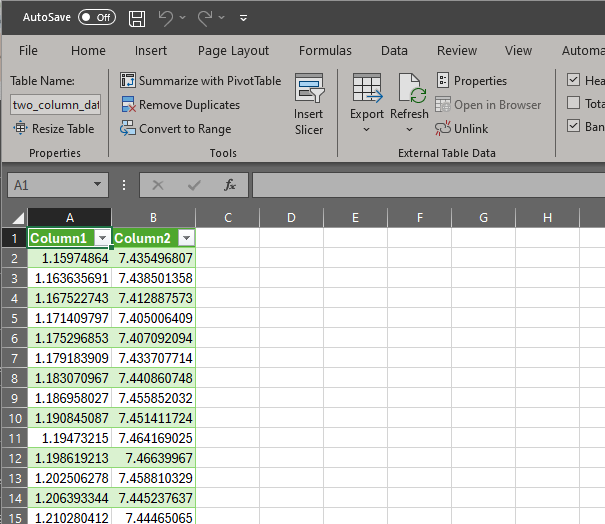

But this is very inefficient and we want "python" way of reading this file.

In python, it is only 3-lines of code to read and plot the contents of this file.

In [ ]:
data = np.loadtxt('two-column-data.txt',unpack=True)
plt.figure()
plt.plot(data[0],data[1])

## how about other files here?

In [ ]:
data = np.loadtxt('Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi',unpack=True,skiprows=7)
plt.plot(data[0],data[1])

# Subplots

In [ ]:
# load in each data set as an array
data1 = np.loadtxt('Ni-foil-XAS-data-from-ISS-beamline.dat',unpack=True)
data2 = np.loadtxt('Ni-foil-XAS-data-from-QAS-beamline.dat',unpack=True)

# create subplots with 2 rows, 4 columns
fig, [[ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]] = plt.subplots(2,4,figsize=(15,4))
fig.suptitle('Row 1 is for ISS: i0, it, ir, if vs Energy \n Row 2 is for QAS: i0, it, ir, if vs Energy')

# plot data from ISS
ax1.plot(data1[0],data1[1])
ax2.plot(data1[0],data1[2])
ax3.plot(data1[0],data1[3])
ax4.plot(data1[0],data1[4])

# plot data from QAS
ax5.plot(data2[0],data2[1])
ax6.plot(data2[0],data2[2])
ax7.plot(data2[0],data2[3])
ax8.plot(data2[0],data2[4])

# Date and Time import

This method takes in a String representing the file path,
 and outputs a start date/time and end date/time 
 based on the first and second date/time pairs found in the split file.

In [ ]:
def get_date_time_title(filename):
    # reads in the file
    data_array = open(filename, 'r')
    string = data_array.read()
    string = string[:string.rfind("#")]
    #print(string)
    
    
    # split data file into an array by blank spaces
    values = string.split()
    dates = []
    times = []

    # collect all dates and times present in the data file
    for value in values:
        try:
            dates.append(datetime.strptime(value, "%m/%d/%Y"))
        except Exception as e:
            pass
        try:
            times.append(datetime.strptime(value, "%H:%M:%S"))
        except Exception as e:
            pass

    # create date and time strs
    date1 = dates[0].strftime("%m/%d/%Y")
    date2 = dates[1].strftime("%m/%d/%Y")

    time1 = times[0].strftime("%H:%M:%S")
    time2 = times[1].strftime("%H:%M:%S")

    # find elapsed second count
    secs = times[1].timestamp() - times[0].timestamp()

    # return the title
    return 'Scan started @ ' + date1 + '__' + time1 + ' \n Scan ended @ ' + date2 + '__' + time2 + '\n Scan took: ' + str(secs) + ' seconds'

In [ ]:
# navigate into plain_text directory 
os.chdir('%s/%s/%s'%(here,example_data_path,'plain_text'))

E, I0, It, Ir, If = np.loadtxt('Ni-foil-XAS-data-from-ISS-beamline.dat',unpack=True,usecols=[0,1,2,3,4])

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(E,np.log(I0/Ir))
ax.set_ylabel('$\mu(E)$')
ax.set_xlabel('Photon energy (eV)')

title = get_date_time_title('Ni-foil-XAS-data-from-ISS-beamline.dat')

ax.set_title(title)

In [ ]:
# navigate into plain_text directory 
os.chdir('%s/%s/%s'%(here,example_data_path,'plain_text'))

E, I0, It, Ir, If = np.loadtxt('Ni-foil-XAS-data-from-QAS-beamline.dat',unpack=True,usecols=[0,1,2,3,4])

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(E,np.log(I0/Ir))
ax.set_ylabel('$\mu(E)$')
ax.set_xlabel('Photon energy (eV)')

title = get_date_time_title('Ni-foil-XAS-data-from-QAS-beamline.dat')

ax.set_title(title)

# Alternative Implementation
Courtesy of Mehmet Topsakal

In [ ]:
# instead of entering title string manually, we can do it with python was as below.
# But we need to write a function that will read the dat file and extract time info.
# For one file, this is not much important. But if we have hundreds of dat file,
# it is inevitable to do it python way..


def get_title_str(datfile):
    import datetime
    with open(datfile) as datfile:
        lines = datfile.readlines()
        for e,line in enumerate(lines):
            if line.startswith('# Scan.start_time:'):
                dt_start = datetime.datetime.strptime("%s_%s"%(line.split()[2], line.split()[3]), "%m/%d/%Y_%H:%M:%S")
            elif line.startswith('# Scan.end_time:'):
                dt_stop = datetime.datetime.strptime("%s_%s"%(line.split()[2], line.split()[3]), "%m/%d/%Y_%H:%M:%S")
            elif line.startswith('# Start time:'):
                dt_start = datetime.datetime.strptime("%s_%s"%(line.split()[3], line.split()[4]), "%m/%d/%Y_%H:%M:%S")
            elif line.startswith('# Stop time:'):
                dt_stop = datetime.datetime.strptime("%s_%s"%(line.split()[3], line.split()[4]), "%m/%d/%Y_%H:%M:%S")

    title_str = '%s\n%s\nScan took %.2f seconds'%(
        dt_start.strftime("Scan started @ %m-%d-%Y__%H:%M:%S"),
        dt_stop.strftime("Scan ended @ %m-%d-%Y__%H:%M:%S"),
        (dt_stop.timestamp()-dt_start.timestamp()))

    return title_str


fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(E,np.log(I0/Ir))
ax.set_ylabel('$\mu(E)$')
ax.set_xlabel('Photon energy (eV)')

ax.set_title(get_title_str('Ni-foil-XAS-data-from-ISS-beamline.dat'));

# reading xls files into python

In [ ]:
# navigate into xls directory 
os.chdir('%s/%s/%s'%(here,example_data_path,'xls'))

# read excel file into panda dataframe
df = pd.read_excel('25KI-LiCl-KCl_25oC.xlsx')

fig, ax = plt.subplots()
ax.set_xlim([20,80])
ax.plot(df["Angles"],df["Intensities"])
ax.set_xlabel("2 Theta [deg]")
ax.set_ylabel("Intensity [a.u]")
ax.set_yticks([])
ax.set_title("25KI-LiCl-KCL_25oc")



# reading image files into python

In [ ]:
# navigate into image directory 
os.chdir('%s/%s/%s'%(here,example_data_path,'image'))

from PIL import Image

# aet up plot for images
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10,15))

# open and display image 1
im1 = Image.open('NIST-LaB6.tiff')
ax1.imshow(im1)

# open and display image 2
im2 = Image.open('NIST-LaB6-CeO2-mix.tiff')
ax2.imshow(im2)

# open and display image 3
im3 = Image.open('NIST-LaB6.png')
ax3.imshow(im3)

# reading xarray netCDF files into python

In [ ]:
# navigate into netcdf directory 
os.chdir('%s/%s/%s'%(here,example_data_path,'netcdf'))

with xr.open_dataset('Pt-from-28ID-2-D.nc') as ds:
    ds.load()
ds


plt.figure()
ds.i2d.plot(robust=True,cmap='jet')

In [ ]:
plt.figure()
ds.Yobs.plot()
ds.Ycalc.plot()
ds.Ybkg.plot()

# reading hdf files into python

In [ ]:
# navigate into hdf directory 
os.chdir('%s/%s/%s'%(here,example_data_path,'hdf'))

file = h5py.File('bde401ed-ac56-45cd-b0c5_000000.h5', 'r')

print("Keys of the file: ", list(file.keys()))

entries = file['entry']

print("Keys of value corresponding to 'entry': ",list(entries.keys()))

data = entries['data']
instrument = entries['instrument']

print("Keys of value corresponding to 'data': ",list(data.keys()))
print("Keys of value corresponding to 'instrument': ",list(instrument.keys()))

print(data['data'])

> We see that the data in 'bde401ed-ac56-45cd-b0c5_000000.h5' is a 160 x 1 x 4096 dimensional array, of float 64 (f8) type numbers

# reading numpy files (npy, npz) into python

In [ ]:
# navigate into npy directory 
os.chdir('%s/%s/%s'%(here,example_data_path,'npy'))

file1 = np.load('feff.npz')
file2 = np.load('Ni_calib_20190301-150927_459ff6_0001_mask.npy')

print(file1)
print(file2.shape)

# PILimage = Image.fromarray(file2)
# plt.plot(PILimage)


plt.figure()
plt.imshow(file2)


# reading yaml into python

In [ ]:
# navigate into npy directory 
os.chdir('%s/%s/%s'%(here,example_data_path,'yaml'))

with open('from_xpdacq.yaml') as file:
    data = yaml.safe_load(file)

print(data)

# This is a test

# This is another test